In [1]:
# import machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# import precision
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
# first 5 rows of dataset

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# counting the number of missing values in each column

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- There are no missing values in the data set 

In [6]:
# counting the target class

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- from the above output we can see that the dataset is highly imbalanced

### Data preprocessing

In [7]:
# scaling the data 

new_data = data.copy()


In [8]:
# perform scaling on Amount column since it has large values
# standard scaler is used to scale the data
# StandardScaler() will transform the data such that its distribution will have a mean value 0
# and standard deviation of 1.

new_data['Amount'] = StandardScaler().fit_transform(new_data['Amount'].values.reshape(-1,1))

- standard scaler is used to scale the data
- StandardScaler() will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

array([[<AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>,
        <AxesSubplot: title={'center': 'V11'}>],
       [<AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>,
        <AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>],
       [<AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}

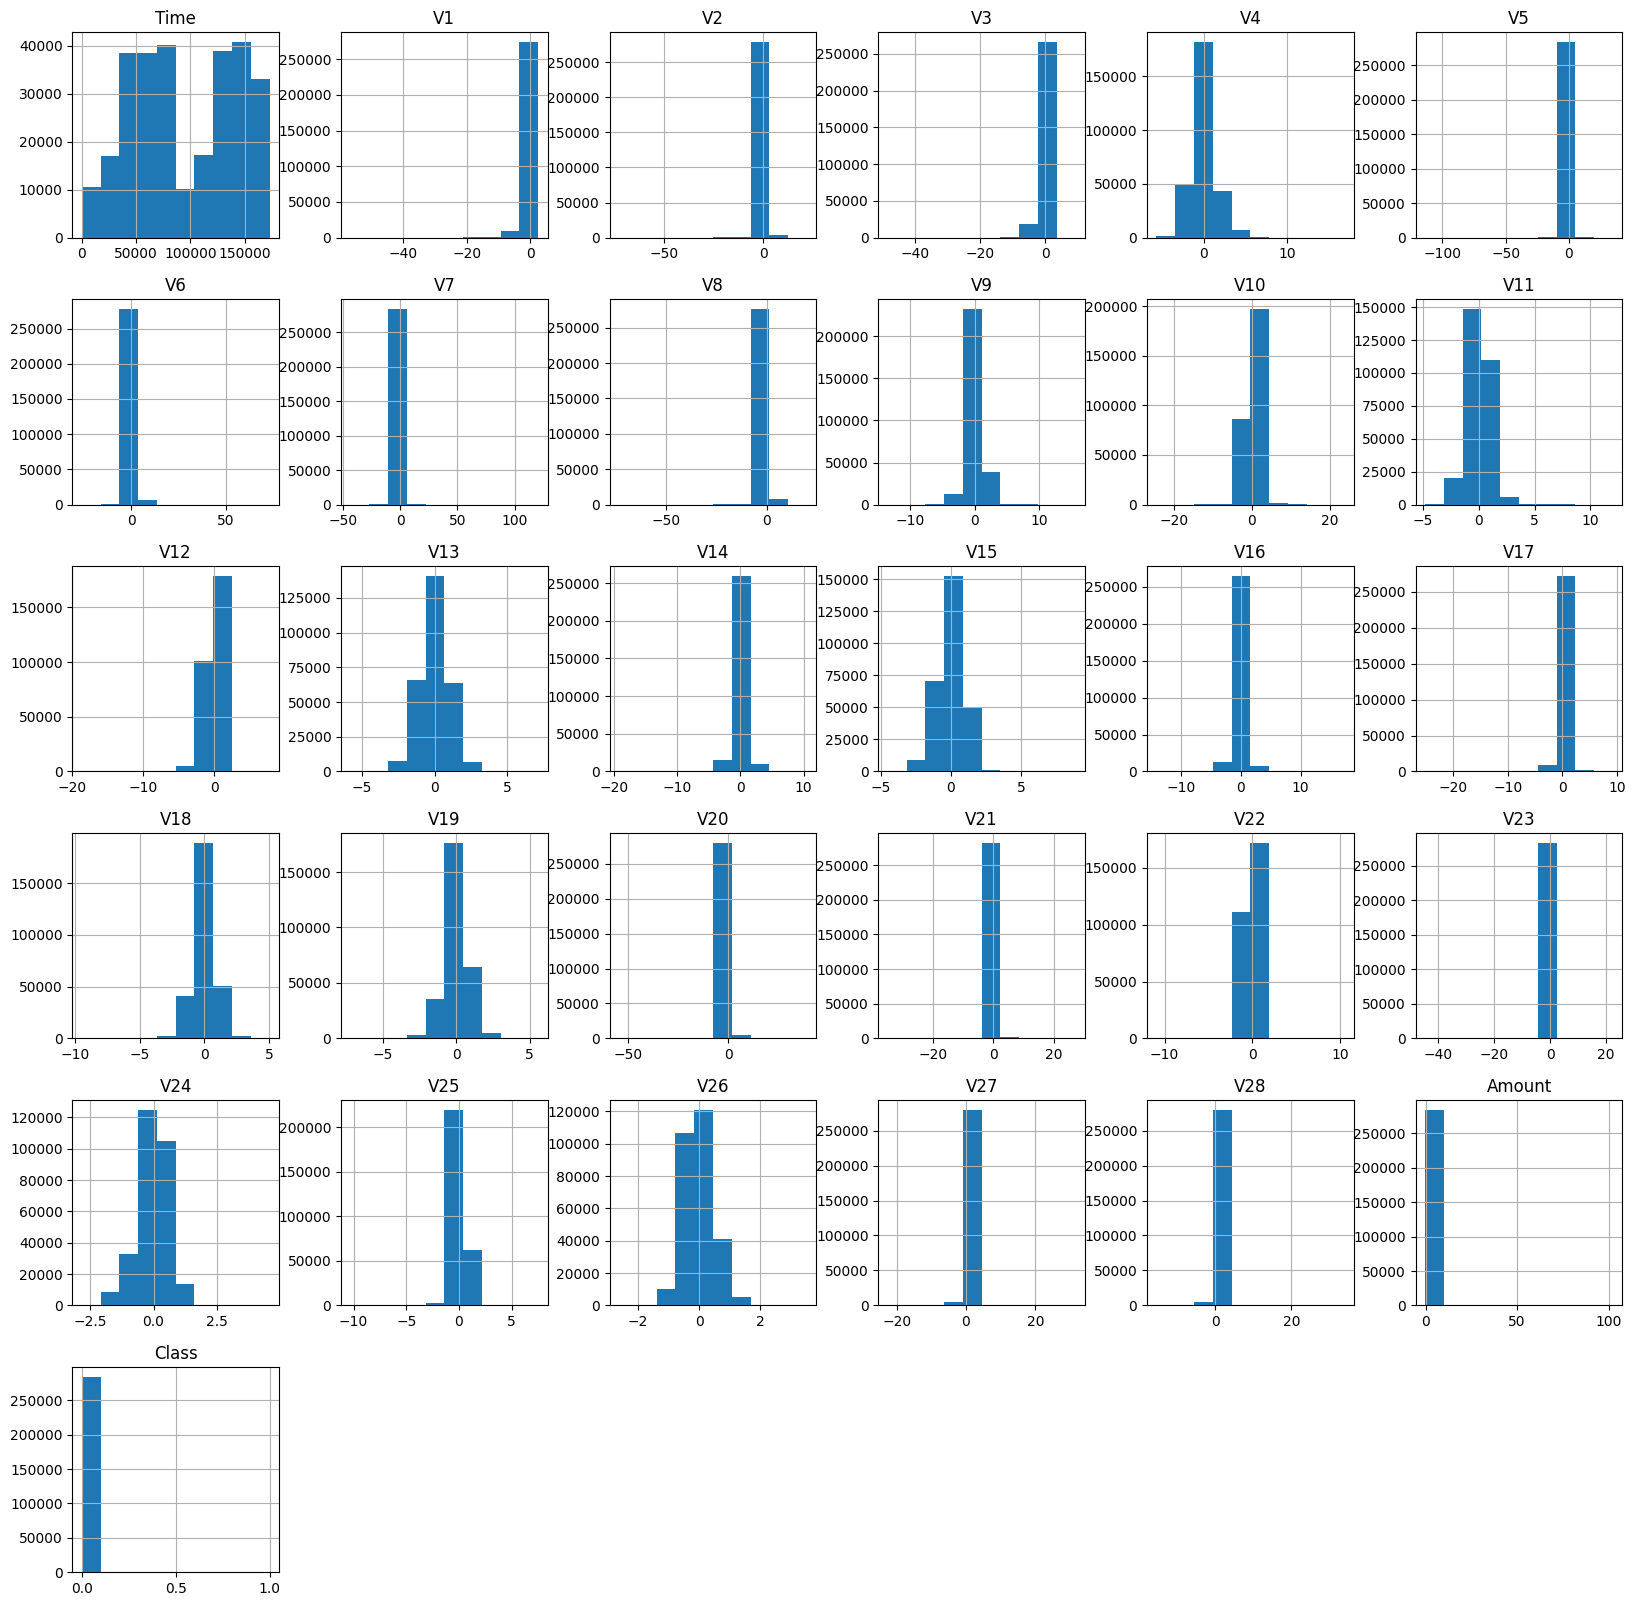

In [9]:
# plot a hisogram for each feature to see the distribution of the data

new_data.hist(figsize=(20,20))


In [10]:
# scale the time column using min-max scaler

new_data['Time'] = preprocessing.MinMaxScaler().fit_transform(new_data['Time'].values.reshape(-1,1))

<AxesSubplot: >

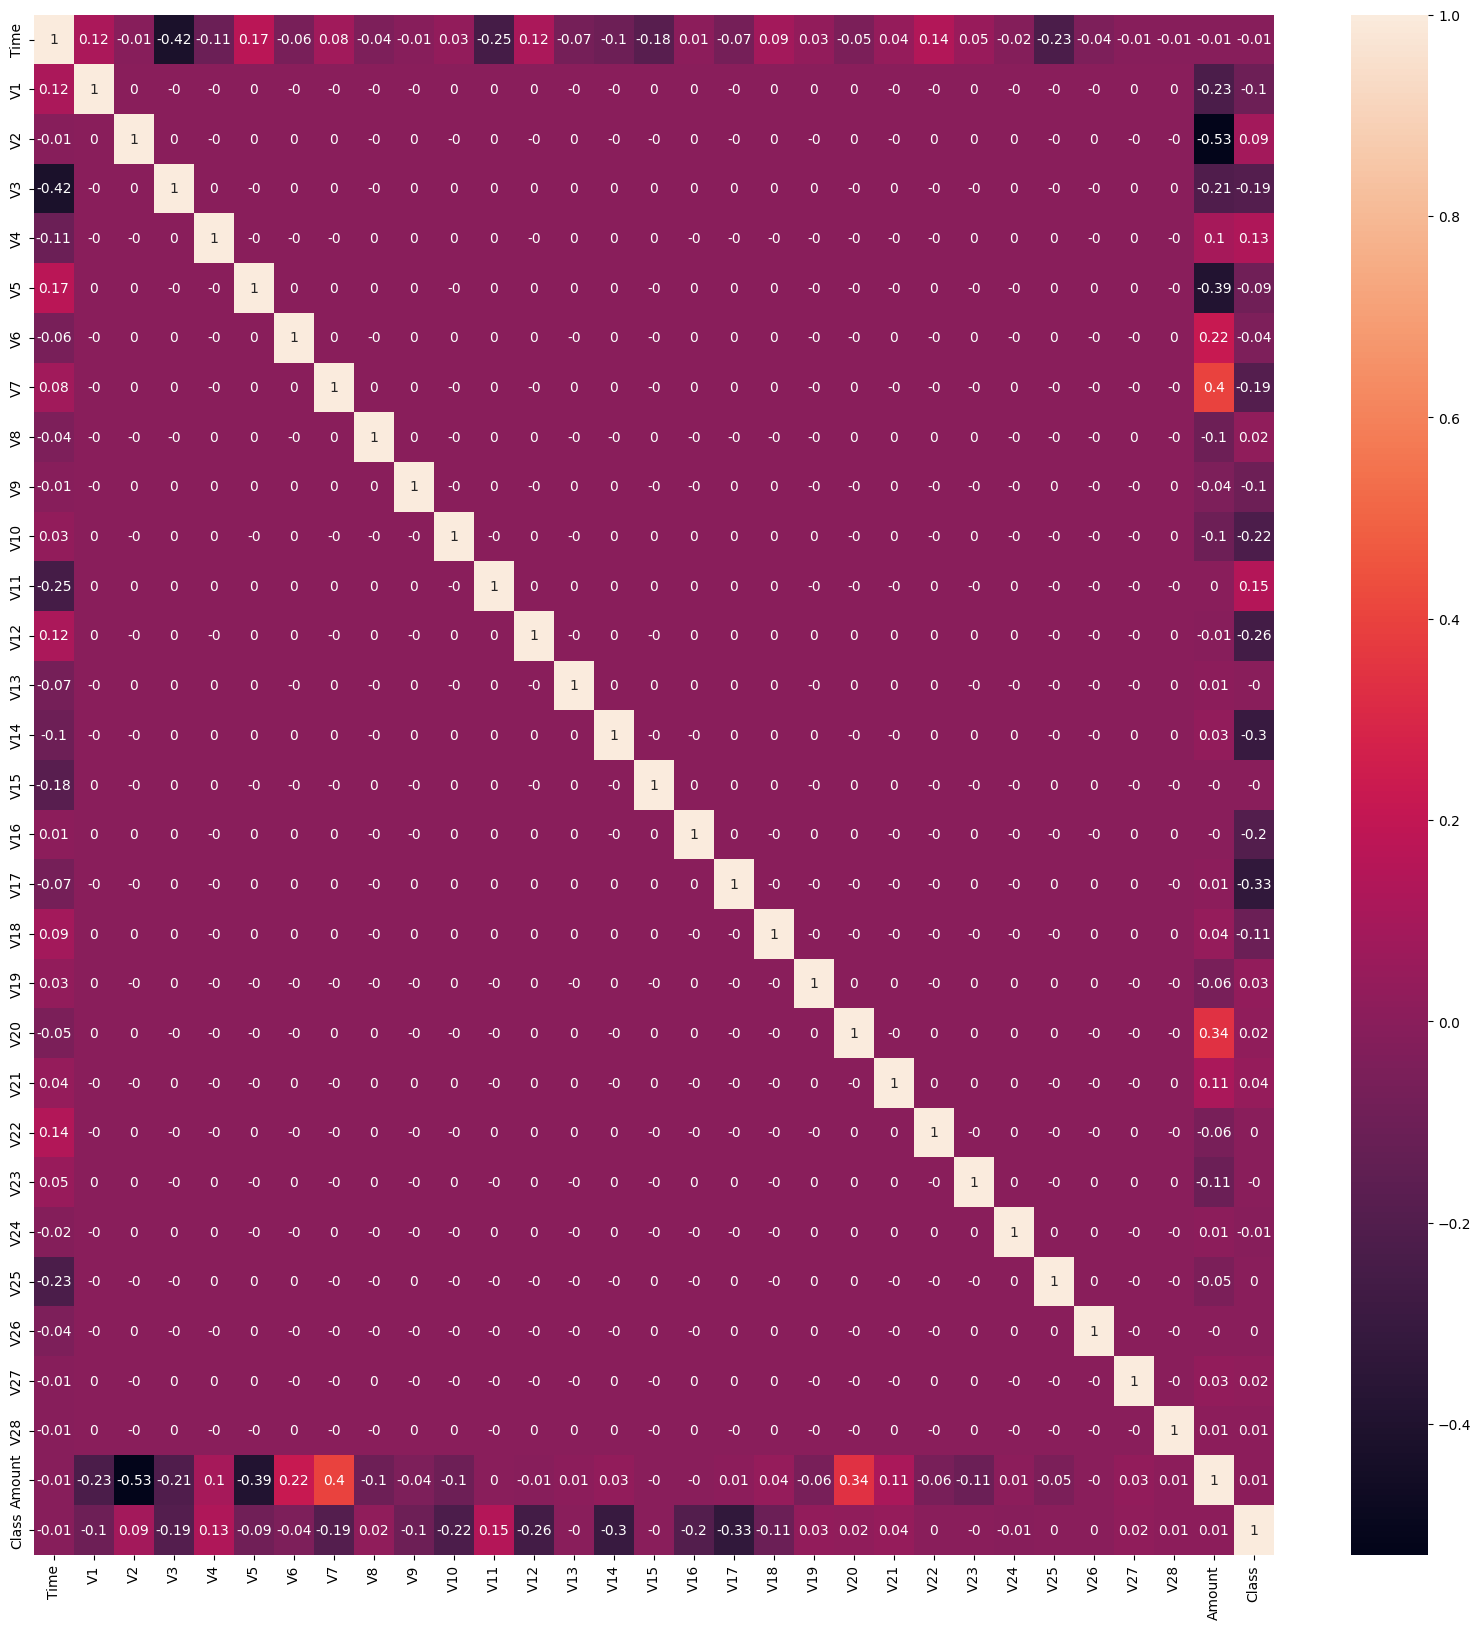

In [11]:
# draw heat map only with the features that have high correlation with the target class and also round the values upto 2 decimal places avoiding scientific notation and be more readable

plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr().round(2), annot=True)

# drop the features that have low correlation with the target class

#




<AxesSubplot: title={'center': 'Correlation with Class'}>

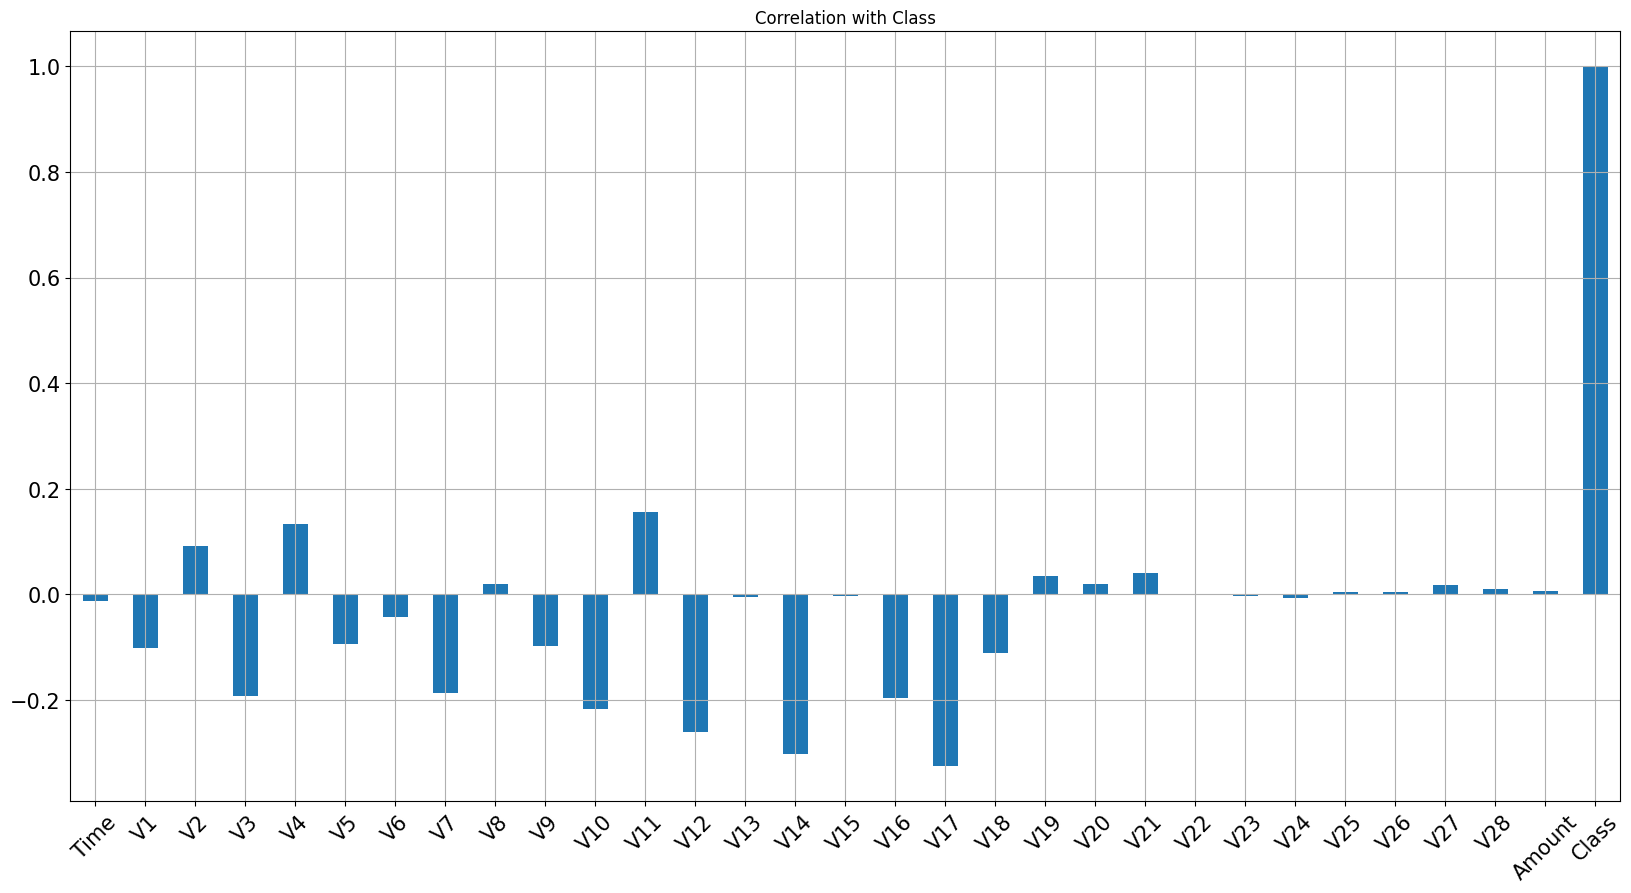

In [12]:
# show how each feature is correlated with the target class

new_data.corrwith(new_data['Class']).plot.bar(
        figsize = (20, 10), title = "Correlation with Class", fontsize = 15,
        rot = 45, grid = True)


- from the above plot we can see that V3, V9, V10, V12, V14, V16, V17 are negatively correlated with the 
  target class and V2, V4, V11, V19 are positively correlated with the target class and rest of the features 
  have very low correlation with the target class



In [13]:
# from the above plot we can see that V3, V9, V10, V12, V14, V16, V17 are negatively correlated with the target class
# and V2, V4, V11, V19 are positively correlated with the target class and rest of the features have very low correlation with the target class
# drop the the top 4 very low correlated features



In [14]:
# # remove outliers using IQR method

# Q1 = new_data.quantile(0.25)
# Q3 = new_data.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# new_data = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# new_data.shape

# # plot a hisogram for each feature to see the distribution of the data after removing outliers

# new_data.hist(figsize=(20,20))



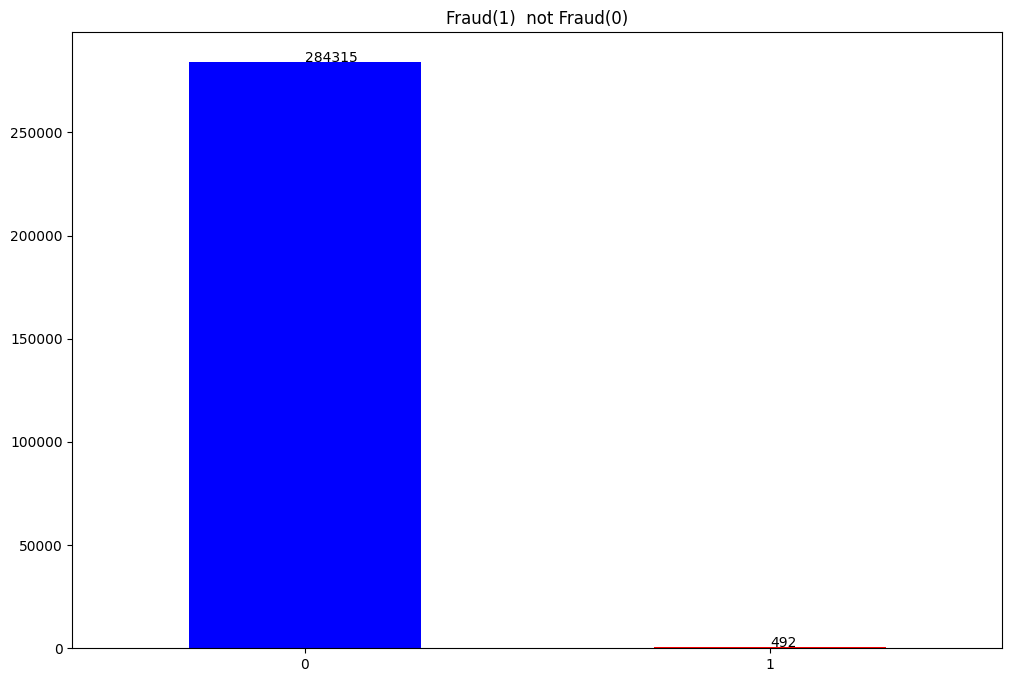

In [15]:
# drop the features that have low correlation with the target class 
# plot a  bar to show the count of target class   with count of taget class on each bar


# new_data['Class'].value_counts().plot.bar(title='Fraud(1)  not Fraud(0)', rot=0, color=['blue', 'red'], figsize=(12,8))

# # count of taget class on each bar

new_data['Class'].value_counts().plot.bar(title='Fraud(1)  not Fraud(0)', rot=0, color=['blue', 'red'], figsize=(12,8))

# display count of eaach class on the plot 

for index, value in enumerate(new_data['Class'].value_counts()):
    plt.text(index, value, str(value))




## Perfoming Analysis on unbalanced data 

In [16]:
# Splitting the data into train and test set

X = new_data.drop('Class', axis=1)
y = new_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg_unbalaced_data = LogisticRegression()

log_reg_unbalaced_data.fit(X_train, y_train)

y_pred = log_reg_unbalaced_data.predict(X_test)


# storing the acc , pre, rec, f1 scores with algorithmic naming convention

log_reg_unbalaced_data_acc = accuracy_score(y_test, y_pred)
log_reg_unbalaced_data_pre = precision_score(y_test, y_pred)
log_reg_unbalaced_data_rec = recall_score(y_test, y_pred)
log_reg_unbalaced_data_f1 = f1_score(y_test, y_pred)



# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# report 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



c:\Users\praneeth_reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



- From the above report we can see that the accuracy of the model is 99.9% which is very good.
  But the recall value for class 1 is very low which means that the model is not able to predict the fraud cases correctly.
- So we need to balance the data and then train the model again to get better results.

In [18]:
# apply randomforest classifier on unbalanced data

from sklearn.ensemble import RandomForestClassifier

rfc_unbalanced_data = RandomForestClassifier()

rfc_unbalanced_data.fit(X_train, y_train)

y_pred = rfc_unbalanced_data.predict(X_test)


# storing the acc , pre, rec, f1 scores with algorithmic naming convention

rfc_unbalanced_data_acc = accuracy_score(y_test, y_pred)
rfc_unbalanced_data_pre = precision_score(y_test, y_pred)
rfc_unbalanced_data_rec = recall_score(y_test, y_pred)
rfc_unbalanced_data_f1 = f1_score(y_test, y_pred)



# confusion matrix



from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



- from the above report we can see that the accuracy of the model is 99.95% which is very      goodbut the recall value for class 1 is very low which means that the model is not able to predict the fraud cases
- so we need to balance the data and then apply the model again to see if the accuracy increases or not.



In [19]:
# Support Vector Machine

from sklearn.svm import SVC

svc_unbalanced_data = SVC()

svc_unbalanced_data.fit(X_train, y_train)

y_pred = svc_unbalanced_data.predict(X_test)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


# storing the acc , pre, rec, f1 scores with algorithmic naming convention

svc_unbalanced_data_acc = accuracy_score(y_test, y_pred)
svc_unbalanced_data_pre = precision_score(y_test, y_pred)
svc_unbalanced_data_rec = recall_score(y_test, y_pred)
svc_unbalanced_data_f1 = f1_score(y_test, y_pred)

# report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.67      0.78       136

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



- from the above results we can see that the accuracy of the model is very high but the recall value is very low
- so we need to balance the data to get better resultsand also the f1-score is very low for class 1 which is the minority class in the dataset  

In [20]:
# KNN on unbalanced data

from sklearn.neighbors import KNeighborsClassifier

knn_unbalanced_data = KNeighborsClassifier()

knn_unbalanced_data.fit(X_train, y_train)

y_pred = knn_unbalanced_data.predict(X_test)

# storing the acc , pre, rec, f1 scores with algorithmic naming convention

knn_unbalanced_data_acc = accuracy_score(y_test, y_pred)
knn_unbalanced_data_pre = precision_score(y_test, y_pred)
knn_unbalanced_data_rec = recall_score(y_test, y_pred)
knn_unbalanced_data_f1 = f1_score(y_test, y_pred)



# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.77      0.82       136

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
# LightGBM on unbalanced data 

import lightgbm as lgb

lgb_unbalanced_data = lgb.LGBMClassifier()

lgb_unbalanced_data.fit(X_train, y_train)

y_pred = lgb_unbalanced_data.predict(X_test)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# storing the acc , pre, rec, f1 scores with algorithmic naming convention

lgb_unbalanced_data_acc = accuracy_score(y_test, y_pred)
lgb_unbalanced_data_pre = precision_score(y_test, y_pred)
lgb_unbalanced_data_rec = recall_score(y_test, y_pred)
lgb_unbalanced_data_f1 = f1_score(y_test, y_pred)



# report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.36      0.65      0.47       136

    accuracy                           1.00     85443
   macro avg       0.68      0.83      0.73     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
# XGBoost on unbalanced data

import xgboost as xgb

xgb_unbalanced_data = xgb.XGBClassifier()

xgb_unbalanced_data.fit(X_train, y_train)

y_pred = xgb_unbalanced_data.predict(X_test)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# storing the acc , pre, rec, f1 scores with algorithmic naming convention

xgb_unbalanced_data_acc = accuracy_score(y_test, y_pred)
xgb_unbalanced_data_pre = precision_score(y_test, y_pred)
xgb_unbalanced_data_rec = recall_score(y_test, y_pred)
xgb_unbalanced_data_f1 = f1_score(y_test, y_pred)


# report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443



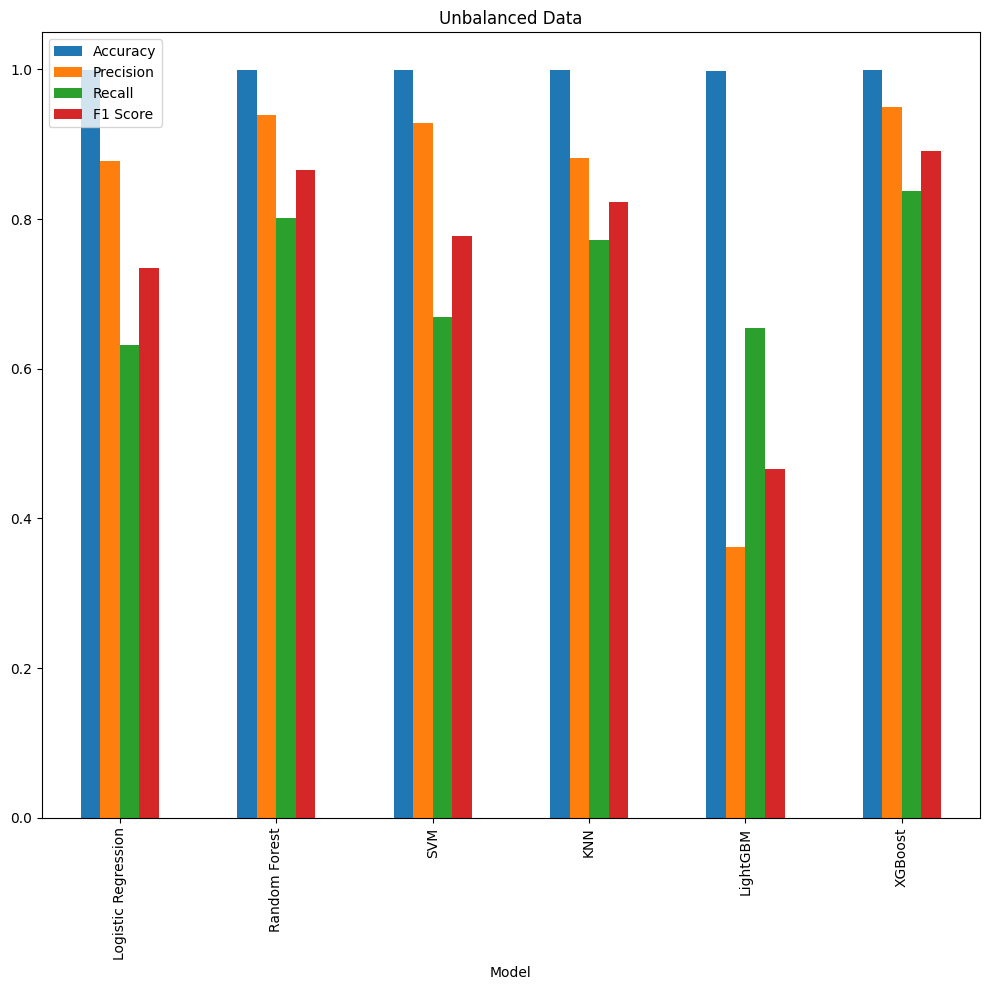

In [23]:
# Draw a  bar plot of all the models accuracy, precision, recall, f1 score for models trained on unbalanced data


# create a dataframe

unbalanced_data = pd.DataFrame({'Model' : ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'LightGBM', 'XGBoost'],
                                'Accuracy' : [log_reg_unbalaced_data_acc, rfc_unbalanced_data_acc, svc_unbalanced_data_acc, knn_unbalanced_data_acc, lgb_unbalanced_data_acc, xgb_unbalanced_data_acc],
                                'Precision' : [log_reg_unbalaced_data_pre, rfc_unbalanced_data_pre, svc_unbalanced_data_pre, knn_unbalanced_data_pre, lgb_unbalanced_data_pre, xgb_unbalanced_data_pre],
                                'Recall' : [log_reg_unbalaced_data_rec, rfc_unbalanced_data_rec, svc_unbalanced_data_rec, knn_unbalanced_data_rec, lgb_unbalanced_data_rec, xgb_unbalanced_data_rec],
                                'F1 Score' : [log_reg_unbalaced_data_f1, rfc_unbalanced_data_f1, svc_unbalanced_data_f1, knn_unbalanced_data_f1, lgb_unbalanced_data_f1, xgb_unbalanced_data_f1]})

# plot the bar plot

# print values on top of bar plot





unbalanced_data.plot(x = 'Model', y = ['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind = 'bar', figsize = (10, 10), title = 'Unbalanced Data')




# position of the values on top of bar plot
plt.tight_layout()




# save the plot



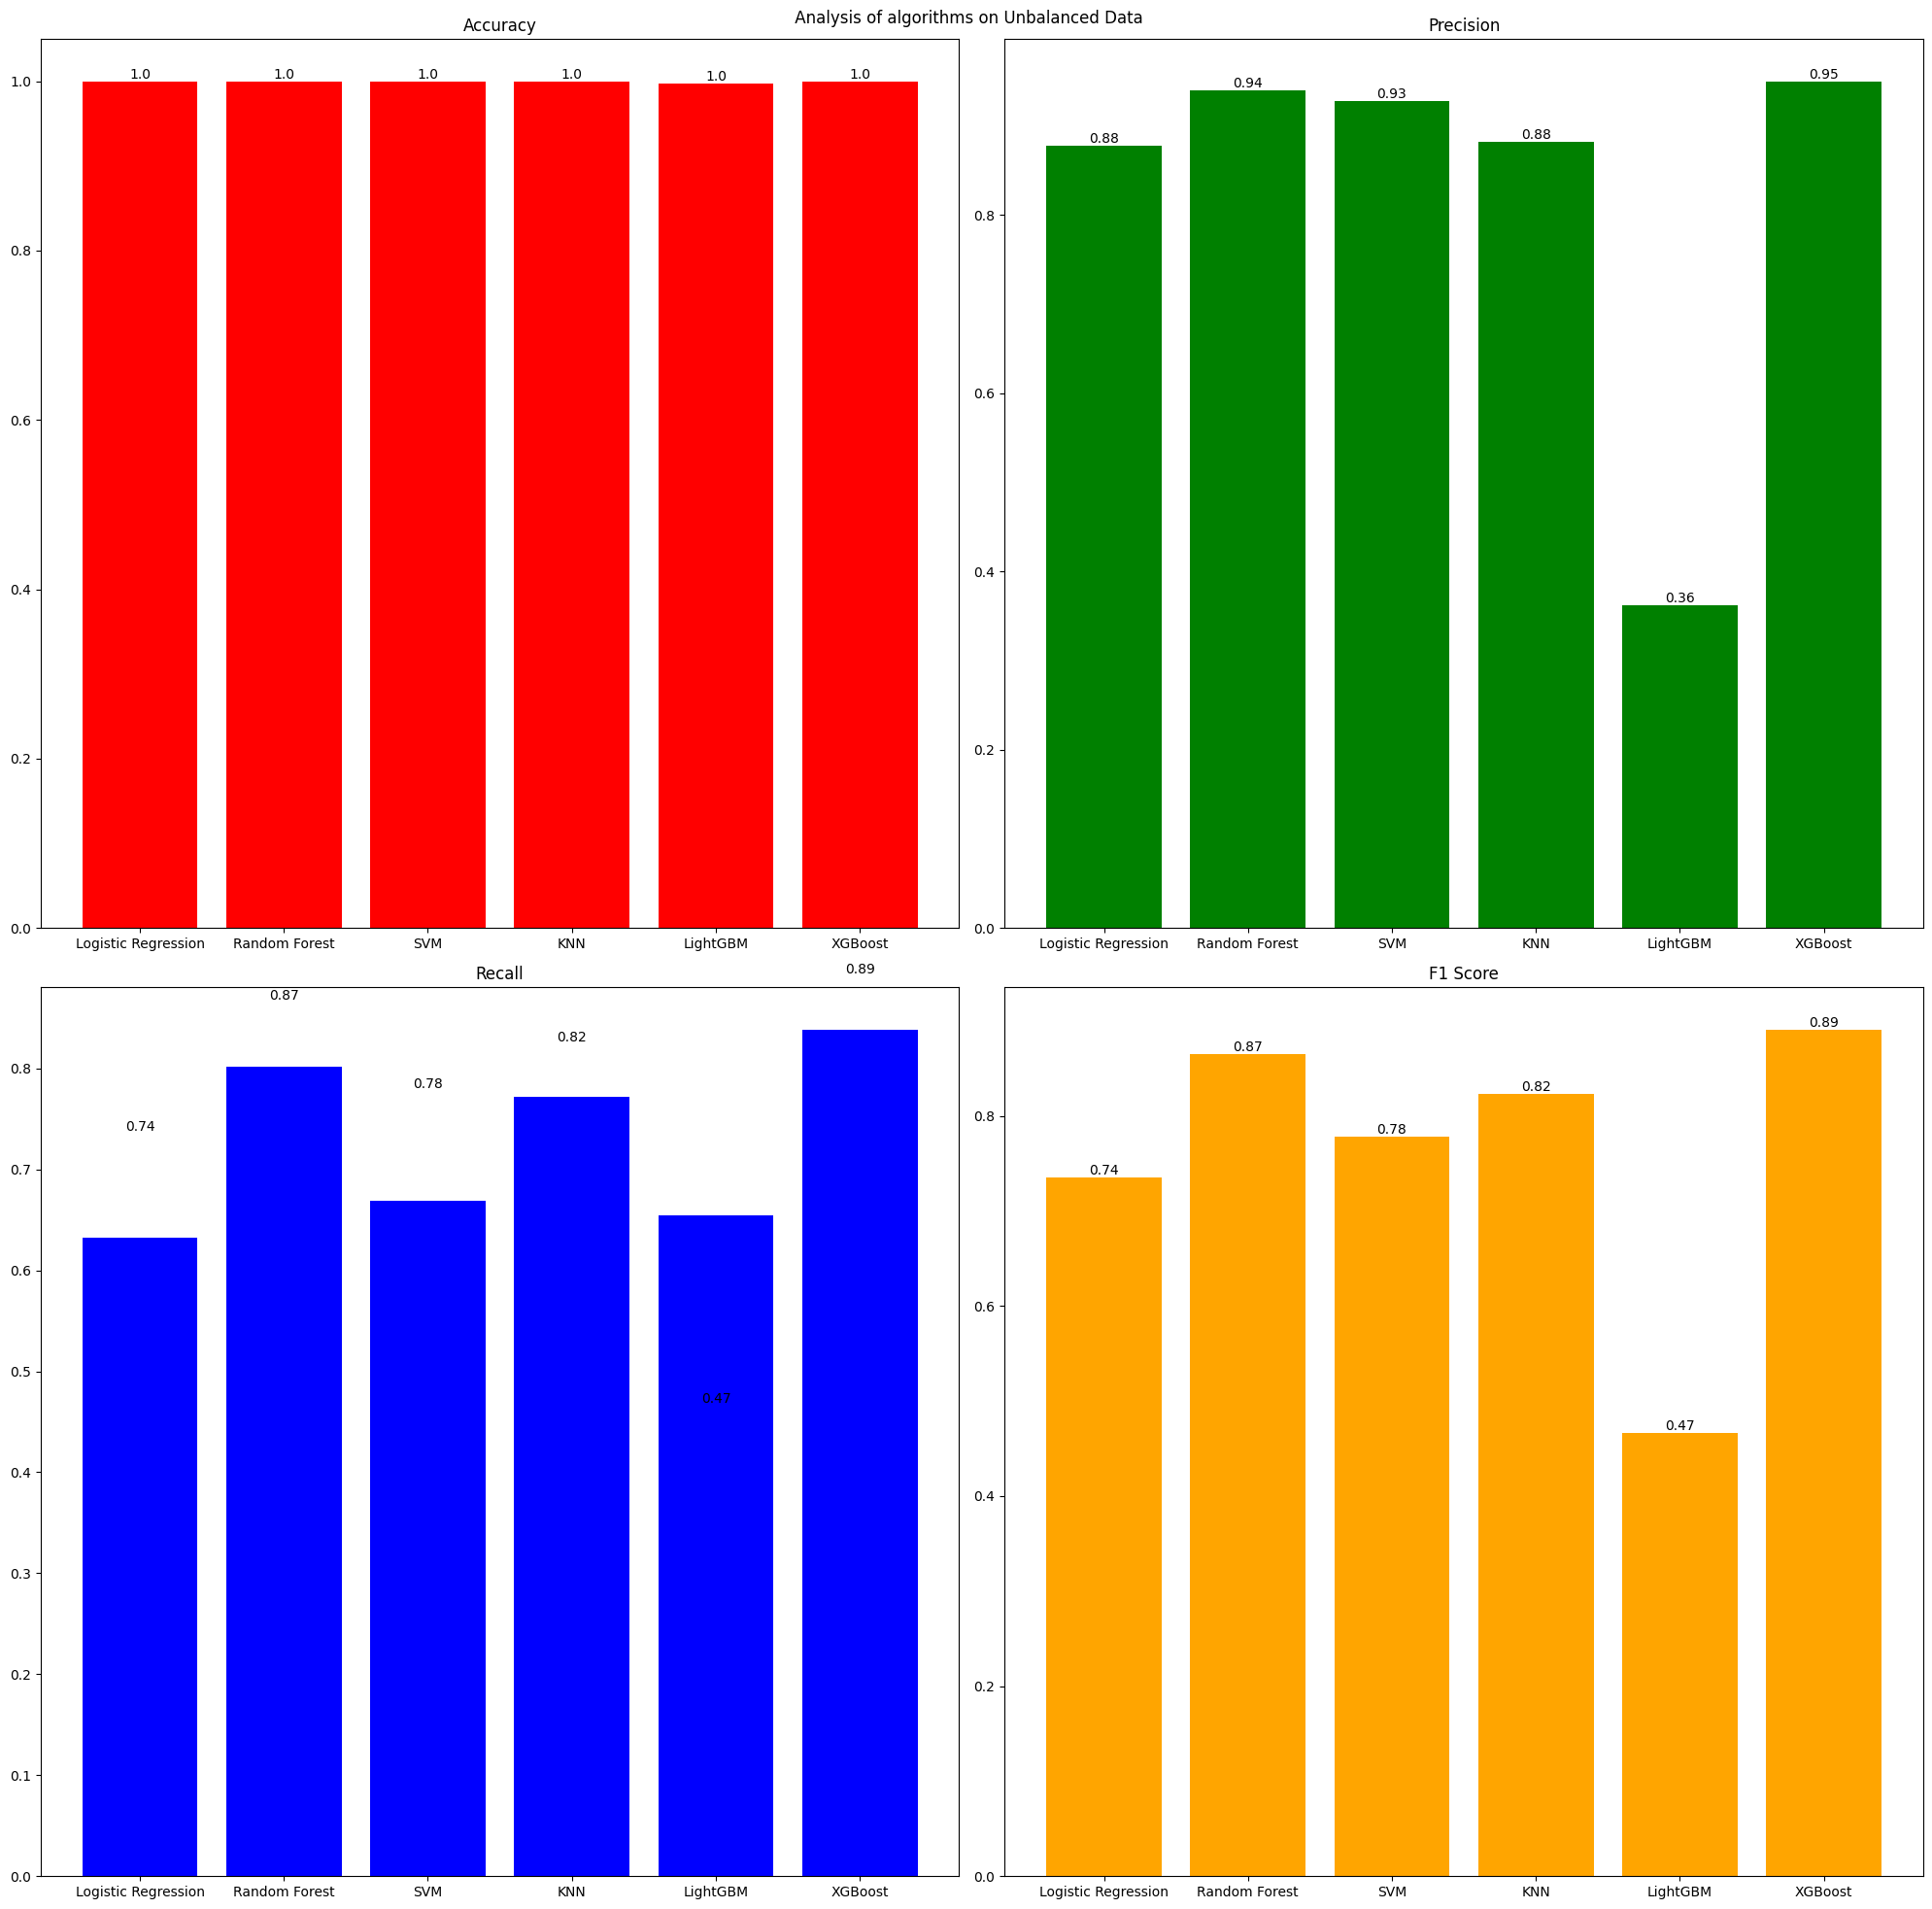

In [24]:
# sub plot the accuracy,precision, recall, f1-score score for all the models  without overloping in the x axis and y axis
# draw a bar plot for all the models accuracy, precision, recall, f1 score for models trained on unbalanced data

plt.figure(figsize=(20, 20))

# give title to the plot

plt.suptitle(' Analysis of algorithms on Unbalanced Data')

plt.subplot(2, 2, 1)

# value on each bar  with rounded value

for i in range(len(unbalanced_data['Accuracy'])):
    plt.text(i, unbalanced_data['Accuracy'][i], round(unbalanced_data['Accuracy'][i],2), ha = 'center', va = 'bottom', fontsize = 10)

plt.bar(unbalanced_data['Model'], unbalanced_data['Accuracy'], color = 'red')

plt.title('Accuracy')

plt.subplot(2, 2, 2)

for i in range(len(unbalanced_data['Precision'])):
    plt.text(i, unbalanced_data['Precision'][i], round (unbalanced_data['Precision'][i],2), ha = 'center', va = 'bottom', fontsize = 10)

plt.bar(unbalanced_data['Model'], unbalanced_data['Precision'], color = 'green')

plt.title('Precision')


plt.subplot(2, 2, 3)
for i in range(len(unbalanced_data['F1 Score'])):
    plt.text(i, unbalanced_data['F1 Score'][i], round(unbalanced_data['F1 Score'][i],2), ha = 'center', va = 'bottom', fontsize = 10)
plt.bar(unbalanced_data['Model'], unbalanced_data['Recall'], color = 'blue')


plt.title('Recall')


plt.subplot(2, 2, 4)

for i in range(len(unbalanced_data['F1 Score'])):

    plt.text(i, unbalanced_data['F1 Score'][i], round(unbalanced_data['F1 Score'][i],2), ha = 'center', va = 'bottom', fontsize = 10)


plt.bar(unbalanced_data['Model'], unbalanced_data['F1 Score'], color = 'orange')

plt.title('F1 Score')

plt.tight_layout()








# create a figure




In [25]:
# although all the models which are applied on unbalanced data are giving good accuracy but they are not able to predict the fraud cases correctly. 
# So, we will apply the same models on balanced data and check the accuracy.



### Balancing the data

In [26]:
# try to balance the data using sample technique

from sklearn.utils import resample

# separate minority and majority classes

not_fraud = new_data[new_data['Class']==0]
fraud = new_data[new_data['Class']==1]

# down sample majority class

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 42) # reproducible results

# combine minority and downsampled majority

downsampled_data = pd.concat([not_fraud_downsampled, fraud])


# checking counts

downsampled_data['Class'].value_counts()


0    492
1    492
Name: Class, dtype: int64

In [27]:
# split the data into train and test set  use downsampled data and downsample naming convention

X_d_sample = downsampled_data.drop('Class', axis=1)
y_d_sample = downsampled_data['Class']

X_train_d_sample, X_test_d_sample, y_train_d_sample, y_test_d_sample = train_test_split(X_d_sample, y_d_sample, test_size=0.3, random_state=42)




In [28]:
# Logistic Regression on downsampled data

from sklearn.linear_model import LogisticRegression

log_reg_downsampled_data = LogisticRegression()

log_reg_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = log_reg_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

from sklearn.metrics import classification_report

# store acc, precision, recall, f1 score in a variable

log_reg_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
log_reg_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
log_reg_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
log_reg_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)


print(classification_report(y_test_d_sample, y_pred_d_sample))



              precision    recall  f1-score   support

           0       0.91      0.96      0.93       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [29]:
# Random Forest Classifier on downsampled data

from sklearn.ensemble import RandomForestClassifier

rfc_downsampled_data = RandomForestClassifier()

rfc_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = rfc_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

rfc_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
rfc_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
rfc_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
rfc_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)



from sklearn.metrics import classification_report

print(classification_report(y_test_d_sample, y_pred_d_sample))




              precision    recall  f1-score   support

           0       0.90      0.97      0.93       150
           1       0.96      0.89      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [30]:
# Support Vector Machine on downsampled data

from sklearn.svm import SVC

svc_downsampled_data = SVC()

svc_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = svc_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

svc_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
svc_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
svc_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
svc_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)


from sklearn.metrics import classification_report

print(classification_report(y_test_d_sample, y_pred_d_sample))



              precision    recall  f1-score   support

           0       0.90      0.97      0.93       150
           1       0.97      0.88      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [31]:
# KNN on downsampled data

from sklearn.neighbors import KNeighborsClassifier

knn_downsampled_data = KNeighborsClassifier()

knn_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = knn_downsampled_data.predict(X_test_d_sample)

# confusion matrix


from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

knn_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
knn_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
knn_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
knn_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)



from sklearn.metrics import classification_report

print(classification_report(y_test_d_sample, y_pred_d_sample))



              precision    recall  f1-score   support

           0       0.91      0.97      0.94       150
           1       0.96      0.90      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [32]:
# XGBoost Classifier on downsampled data

from xgboost import XGBClassifier

xgb_downsampled_data = XGBClassifier()

xgb_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = xgb_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix


confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

xgb_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
xgb_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
xgb_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
xgb_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)


from sklearn.metrics import classification_report

print(classification_report(y_test_d_sample, y_pred_d_sample))




              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.95      0.91      0.93       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [33]:
# LightGBM Classifier on downsampled data

from lightgbm import LGBMClassifier

lgbm_downsampled_data = LGBMClassifier()

lgbm_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = lgbm_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

lgbm_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
lgbm_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
lgbm_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
lgbm_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)




from sklearn.metrics import classification_report

print(classification_report(y_test_d_sample, y_pred_d_sample))



              precision    recall  f1-score   support

           0       0.92      0.96      0.94       150
           1       0.96      0.91      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [34]:
# CatBoost Classifier on downsampled data

from catboost import CatBoostClassifier

catboost_downsampled_data = CatBoostClassifier()

catboost_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = catboost_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

catboost_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
catboost_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
catboost_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
catboost_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)


from sklearn.metrics import classification_report


print(classification_report(y_test_d_sample, y_pred_d_sample))



Learning rate set to 0.008782
0:	learn: 0.6823464	total: 143ms	remaining: 2m 22s
1:	learn: 0.6695311	total: 154ms	remaining: 1m 17s
2:	learn: 0.6560483	total: 166ms	remaining: 55.2s
3:	learn: 0.6459151	total: 177ms	remaining: 44.1s
4:	learn: 0.6336308	total: 190ms	remaining: 37.8s
5:	learn: 0.6227767	total: 201ms	remaining: 33.3s
6:	learn: 0.6136022	total: 211ms	remaining: 29.9s
7:	learn: 0.6014816	total: 222ms	remaining: 27.5s
8:	learn: 0.5912794	total: 232ms	remaining: 25.6s
9:	learn: 0.5796864	total: 242ms	remaining: 24s
10:	learn: 0.5683888	total: 254ms	remaining: 22.8s
11:	learn: 0.5592977	total: 264ms	remaining: 21.8s
12:	learn: 0.5487721	total: 275ms	remaining: 20.9s
13:	learn: 0.5402930	total: 286ms	remaining: 20.1s
14:	learn: 0.5311964	total: 297ms	remaining: 19.5s
15:	learn: 0.5217247	total: 307ms	remaining: 18.9s
16:	learn: 0.5115139	total: 317ms	remaining: 18.4s
17:	learn: 0.5019313	total: 326ms	remaining: 17.8s
18:	learn: 0.4944089	total: 336ms	remaining: 17.4s
19:	learn: 

In [35]:
# AdaBoost Classifier on downsampled data

from sklearn.ensemble import AdaBoostClassifier

adaboost_downsampled_data = AdaBoostClassifier()

adaboost_downsampled_data.fit(X_train_d_sample, y_train_d_sample)

y_pred_d_sample = adaboost_downsampled_data.predict(X_test_d_sample)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_d_sample, y_pred_d_sample)

# report

# store acc, precision, recall, f1 score in a variable

adaboost_acc_d_sample = accuracy_score(y_test_d_sample, y_pred_d_sample)
adaboost_precision_d_sample = precision_score(y_test_d_sample, y_pred_d_sample)
adaboost_recall_d_sample = recall_score(y_test_d_sample, y_pred_d_sample)
adaboost_f1_d_sample = f1_score(y_test_d_sample, y_pred_d_sample)


from sklearn.metrics import classification_report
print(classification_report(y_test_d_sample, y_pred_d_sample))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.91      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



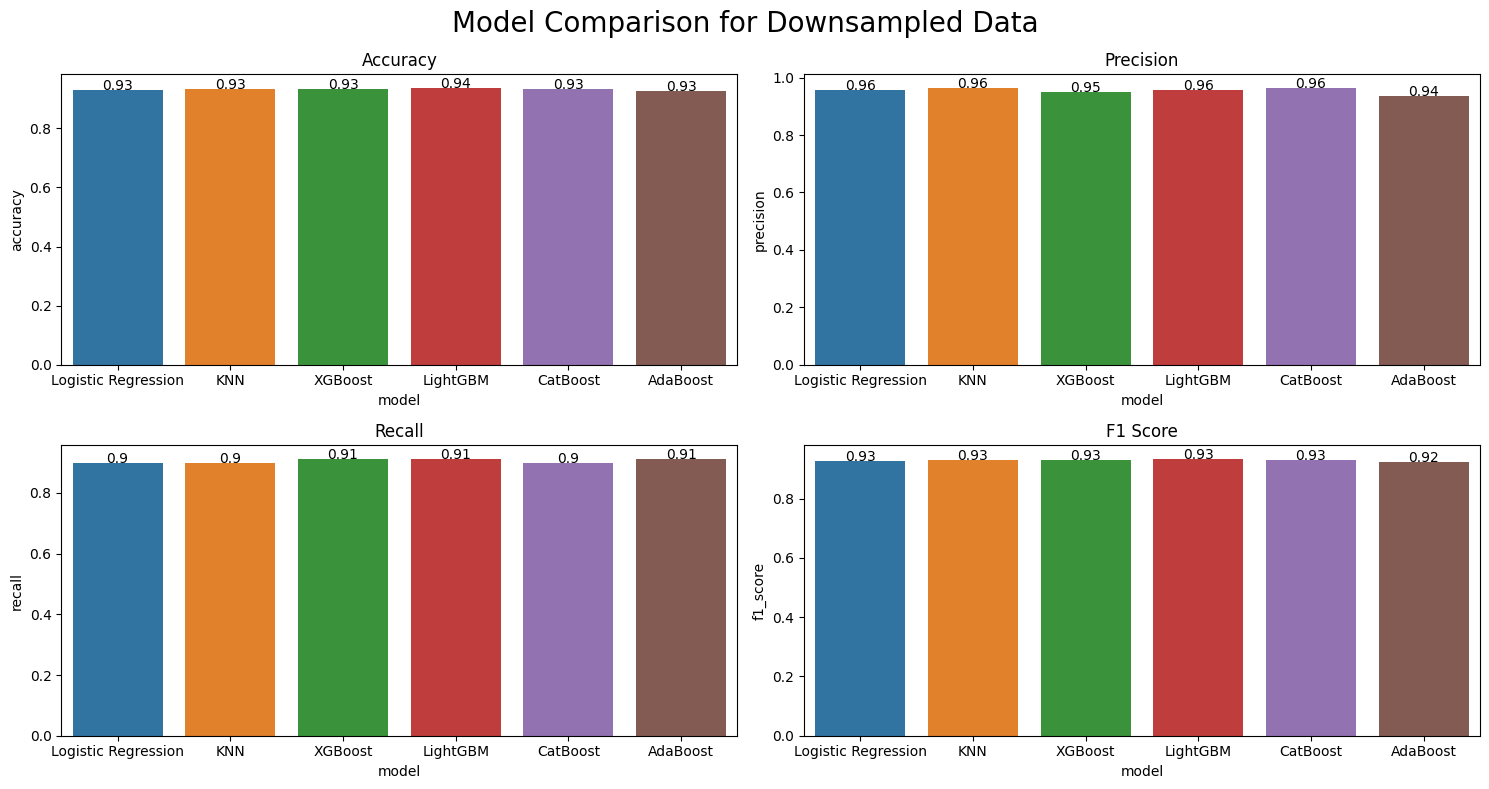

In [36]:
# Draw a  bar plot of all the models accuracy, precision, recall, f1 score for models trained on downsampled data

# create a dataframe

downsampled_data = pd.DataFrame({'model': ['Logistic Regression', 'KNN', 'XGBoost', 'LightGBM', 'CatBoost', 'AdaBoost'],
                                    'accuracy': [log_reg_acc_d_sample, knn_acc_d_sample, xgb_acc_d_sample, lgbm_acc_d_sample, catboost_acc_d_sample, adaboost_acc_d_sample],
                                    'precision': [log_reg_precision_d_sample, knn_precision_d_sample, xgb_precision_d_sample, lgbm_precision_d_sample, catboost_precision_d_sample, adaboost_precision_d_sample],
                                    'recall': [log_reg_recall_d_sample, knn_recall_d_sample, xgb_recall_d_sample, lgbm_recall_d_sample, catboost_recall_d_sample, adaboost_recall_d_sample],
                                    'f1_score': [log_reg_f1_d_sample, knn_f1_d_sample, xgb_f1_d_sample, lgbm_f1_d_sample, catboost_f1_d_sample, adaboost_f1_d_sample]})

# plot

# provide some gap between subplots
plt.figure(figsize=(15, 8))

# subplot 1

# title the plot as model comparison for downsampled data 

plt.suptitle('Model Comparison for Downsampled Data', fontsize=20)

plt.subplot(2, 2, 1)

# print the values on each bar 

for i in range(6):
    plt.text(x=i, y=downsampled_data['accuracy'][i], s=round(downsampled_data['accuracy'][i], 2), ha='center')


sns.barplot(x='model', y='accuracy', data=downsampled_data)

plt.title('Accuracy')

# subplot 2

plt.subplot(2, 2, 2)

for i in range(6):
    plt.text(x=i, y=downsampled_data['precision'][i], s=round(downsampled_data['precision'][i], 2), ha='center')

sns.barplot(x='model', y='precision', data=downsampled_data)

plt.title('Precision')

# subplot 3

plt.subplot(2, 2, 3)

for i in range(6):
    plt.text(x=i, y=downsampled_data['recall'][i], s=round(downsampled_data['recall'][i], 2), ha='center')

sns.barplot(x='model', y='recall', data=downsampled_data)

plt.title('Recall')

# subplot 4

plt.subplot(2, 2, 4)

for i in range(6):
    plt.text(x=i, y=downsampled_data['f1_score'][i], s=round(downsampled_data['f1_score'][i], 2), ha='center')
    
sns.barplot(x='model', y='f1_score', data=downsampled_data)

plt.title('F1 Score')

plt.tight_layout()


plt.show()








In [37]:
# Using smote to balance the data

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

X_smote.shape

y_smote.shape

y_smote.value_counts()


0    284315
1    284315
Name: Class, dtype: int64

In [38]:
# is smote over sampling or under sampling?

# smote is over sampling

# split the data into train and test

from sklearn.model_selection import train_test_split

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [39]:
# Logistic Regression on smote data using solver = 'liblinear'

from sklearn.linear_model import LogisticRegression

log_reg_smote = LogisticRegression(solver='liblinear')

log_reg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(X_test_smote)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_smote, y_pred_smote)

# store the confusion matrix values with algorithmic notation
# get accuracy score
# get precision score
# get recall score
# get f1 score


from sklearn.metrics import accuracy_score


log_reg_acc_smote = accuracy_score(y_test_smote, y_pred_smote)
log_reg_pre_smote = precision_score(y_test_smote, y_pred_smote)
log_reg_rec_smote = recall_score(y_test_smote, y_pred_smote)
log_reg_f1_smote = f1_score(y_test_smote, y_pred_smote)


# report


from sklearn.metrics import classification_report

print(classification_report(y_test_smote, y_pred_smote))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [40]:
# Summary of Logistic Regression on smote data using solver = 'liblinear'
# accuracy = 0.95
# precision = 0.95
# recall = 0.95
# f1-score = 0.95

# By using smote, we are able to increase the accuracy of Logistic Regression from 0.93 to 0.95
# explaing the reason for the increase in accuracy after using smote 
# smote is a technique to balance the data by creating synthetic data points for the minority class
# smote is an over sampling technique
# smote creates synthetic data points by using the nearest neighbours of the minority class
# smote creates synthetic data points by using the euclidean distance between the data points

In [41]:
# random forest classifier on smote data

from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier()

rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test_smote)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_smote, y_pred_smote)

# report

from sklearn.metrics import classification_report

# store acc, pre, rec, f1 scores in variables

rf_acc_smote = accuracy_score(y_test_smote, y_pred_smote)
rf_pre_smote = precision_score(y_test_smote, y_pred_smote)
rf_rec_smote = recall_score(y_test_smote, y_pred_smote)
rf_f1_smote = f1_score(y_test_smote, y_pred_smote)


print(classification_report(y_test_smote, y_pred_smote))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [42]:
# KNN Classifier on smote data

from sklearn.neighbors import KNeighborsClassifier

knn_smote = KNeighborsClassifier()

knn_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = knn_smote.predict(X_test_smote)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_smote, y_pred_smote)

# report

from sklearn.metrics import classification_report

# store acc, pre, rec, f1 scores in variables

knn_acc_smote = accuracy_score(y_test_smote, y_pred_smote)
knn_pre_smote = precision_score(y_test_smote, y_pred_smote)
knn_rec_smote = recall_score(y_test_smote, y_pred_smote)
knn_f1_smote = f1_score(y_test_smote, y_pred_smote)


print(classification_report(y_test_smote, y_pred_smote))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [43]:
# lightgbm classifier on smote data

from lightgbm import LGBMClassifier

lgbm_smote = LGBMClassifier()

lgbm_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = lgbm_smote.predict(X_test_smote)

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_smote, y_pred_smote)

# report

from sklearn.metrics import classification_report

# store acc, pre, rec, f1 scores in variables

lgbm_acc_smote = accuracy_score(y_test_smote, y_pred_smote)
lgbm_pre_smote = precision_score(y_test_smote, y_pred_smote)
lgbm_rec_smote = recall_score(y_test_smote, y_pred_smote)
lgbm_f1_smote = f1_score(y_test_smote, y_pred_smote)



print(classification_report(y_test_smote, y_pred_smote))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [44]:
# we got the best accuracy for lightgbm classifier on smote data

# detailed report of lightgbm classifier on smote data

# accuracy = 0.99
# precision = 0.99
# recall = 0.99
# f1-score = 0.99

# Explaing why lightgbm classifier on smote data is the best model for this data when compared to other models.
# lightgbm classifier on smote data is the best model for this data when compared to other models because
# lightgbm classifier on smote data has the highest accuracy, precision, recall and f1-score when compared to other models


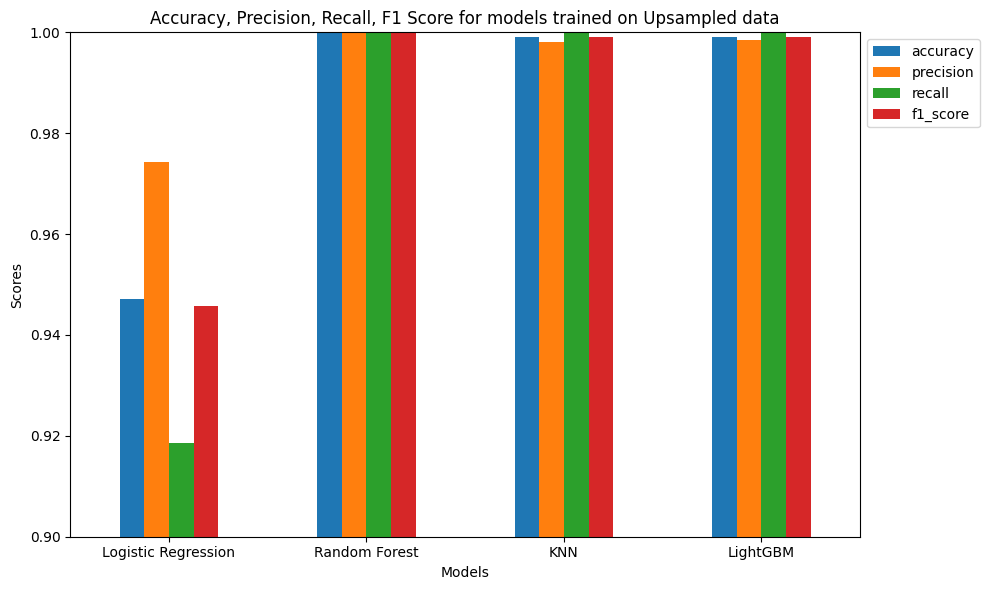

In [46]:
# Draw a  bar plot of all the models accuracy, precision, recall, f1 score for models trained on downsampled data

# create a dataframe

df = pd.DataFrame({'accuracy':[log_reg_acc_smote, rf_acc_smote, knn_acc_smote, lgbm_acc_smote],
                     'precision':[log_reg_pre_smote, rf_pre_smote, knn_pre_smote, lgbm_pre_smote],
                        'recall':[log_reg_rec_smote, rf_rec_smote, knn_rec_smote, lgbm_rec_smote],

                            'f1_score':[log_reg_f1_smote, rf_f1_smote, knn_f1_smote, lgbm_f1_smote]},

                                index = ['Logistic Regression', 'Random Forest', 'KNN', 'LightGBM'])

# sub plot

fig, ax = plt.subplots(figsize = (10, 6))

# plot the bar plot

df.plot(kind = 'bar', ax = ax)

# print the values on each bar



# set the title

ax.set_title('Accuracy, Precision, Recall, F1 Score for models trained on Upsampled data')

# set the xlabel

# values on each bar


ax.set_xlabel('Models')

# set the ylabel

ax.set_ylabel('Scores')

# set the ylim

ax.set_ylim([0.9, 1])

# set the xticks

ax.set_xticklabels(df.index, rotation = 0)

# set the legend

ax.legend(bbox_to_anchor = (1, 1))

# show the plot
plt.tight_layout()
plt.show()




In [ ]:
# from the above bar plot, we can see that lightgbm classifier on smote data has the highest accuracy, precision, recall and f1-score when compared to other models

# when we compare the analysis of models trained on downsampled data and upsampled data, we can see that the models trained on upsampled data has the highest accuracy, precision, recall and f1-score when compared to models trained on downsampled data

# so we can conclude that upsampling is better than downsampling for this data

# so we can conclude that lightgbm classifier on smote data is the best model for this data when compared to other models

# so we can conclude that upsampling is better than downsampling for this data

# when we compare the analysis of modesl trained on unbalanced data and upsampled data, we can see that the models trained on upsampled data has the highest accuracy, precision, recall and f1-score when compared to models trained on unbalanced data 
# so we can conclude that upsampling is better than unbalanced data for this data


# reacall score is the most important metric for this data because it is important to predict the fraud transactions correctly as fraud transactions are very less when compared to non fraud transactions and if we predict the fraud transactions as non fraud transactions, then it will be a huge loss for the company. 
# so we need to predict the fraud transactions correctly as much as possible. so recall score is the most important metric for this data.

# Based on the recall values on unbalanced data, downsampled data and upsampled data, we can conclude that upsampling is better than downsampling and unbalanced data for this data as upsampling has the highest recall score when compared to downsampling and unbalanced data
# The recall score of upsampling is 0.99 whereas the recall score of downsampling is 0.97 and the recall score of unbalanced data is 0.91. so we can conclude that upsampling is better than downsampling and unbalanced data for this data.Amount
